     Length     Weight  Color Uniformity  Hardness  Cluster
0  7.351839  49.592732         20.978738  5.400157        1
1  8.458326  48.306969         20.950088  4.022722        1
2  9.362253  50.816527         20.144044  5.410599        1
3  9.174085  49.507759         20.443863  5.121675        1
4  9.133137  48.279042         20.313068  4.794842        1
            Length       Weight  Color Uniformity     Hardness      Cluster
count  1000.000000  1000.000000       1000.000000  1000.000000  1000.000000
mean     10.372806    50.742817         19.274221     4.705460     1.400000
std       1.299018     1.774307          1.814429     1.192337     0.663657
min       6.928229    46.684861         12.053355    -0.321758     1.000000
25%       9.503319    49.637983         18.693280     3.988138     1.000000
50%      10.260850    50.393231         19.618787     4.792934     1.000000
75%      11.170207    51.350628         20.407366     5.504500     2.000000
max      16.989637    57.855664 

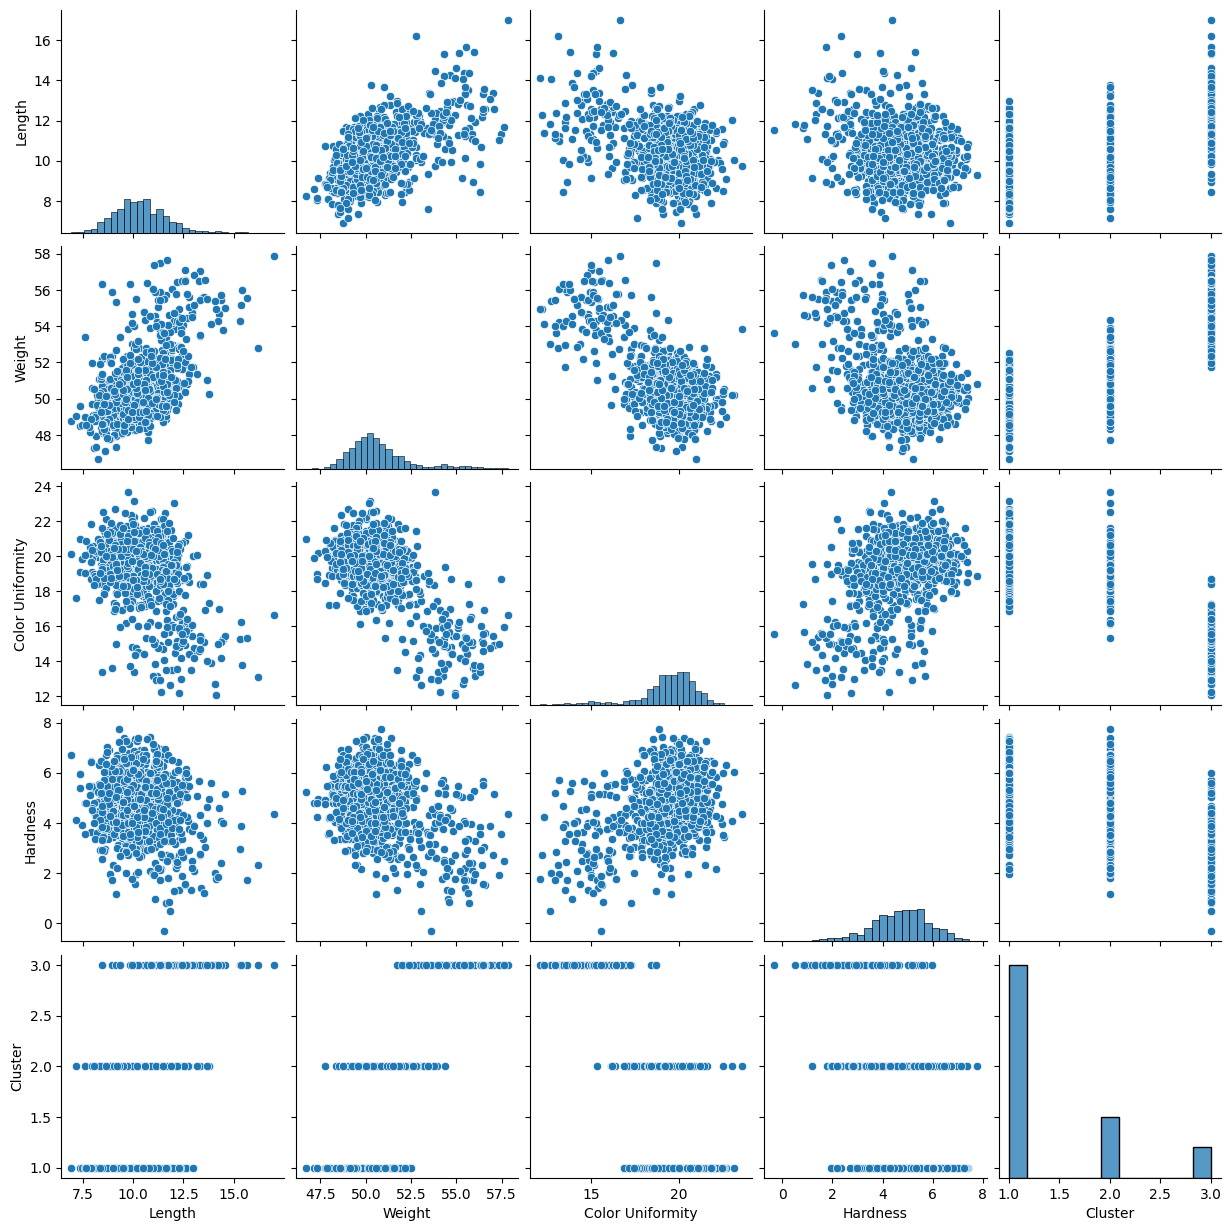

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset_path' with the path to your dataset)
df = pd.read_csv('/content/manufacturing_quality_control_dataset.csv')

# Display the first few rows of the dataframe
print(df.head())

# Describe the dataset to get a statistical summary
print(df.describe())

# Visualize data - this is an example, you might need to change it based on your data
# For numerical data
sns.pairplot(df)
plt.show()

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Remove duplicates
duplicates = df.duplicated().sum()
df_cleaned = df.drop_duplicates()

# Summarize the data to check for inconsistencies
summary = df_cleaned.describe()

missing_values, duplicates, summary

(Length              0
 Weight              0
 Color Uniformity    0
 Hardness            0
 Cluster             0
 dtype: int64,
 0,
             Length       Weight  Color Uniformity     Hardness      Cluster
 count  1000.000000  1000.000000       1000.000000  1000.000000  1000.000000
 mean     10.372806    50.742817         19.274221     4.705460     1.400000
 std       1.299018     1.774307          1.814429     1.192337     0.663657
 min       6.928229    46.684861         12.053355    -0.321758     1.000000
 25%       9.503319    49.637983         18.693280     3.988138     1.000000
 50%      10.260850    50.393231         19.618787     4.792934     1.000000
 75%      11.170207    51.350628         20.407366     5.504500     2.000000
 max      16.989637    57.855664         23.656064     7.761161     3.000000)

In [5]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Number of unique clusters in the 'Cluster' column as an initial guess
n_clusters = df_cleaned['Cluster'].nunique()

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Fit the model
gmm.fit(df_cleaned)

# Predict the clusters
cluster_labels = gmm.predict(df_cleaned)

# Adding the predicted clusters to the dataframe
df_clustered = df_cleaned.copy()
df_clustered['Predicted_Cluster'] = cluster_labels

# Display the first few rows with the predicted clusters
df_clustered.head()

,Length,Weight,Color Uniformity,Hardness,Cluster,Predicted_Cluster
0,7.351839,49.592732,20.978738,5.400157,1,0
1,8.458326,48.306969,20.950088,4.022722,1,0
2,9.362253,50.816527,20.144044,5.410599,1,0
3,9.174085,49.507759,20.443863,5.121675,1,0
4,9.133137,48.279042,20.313068,4.794842,1,0


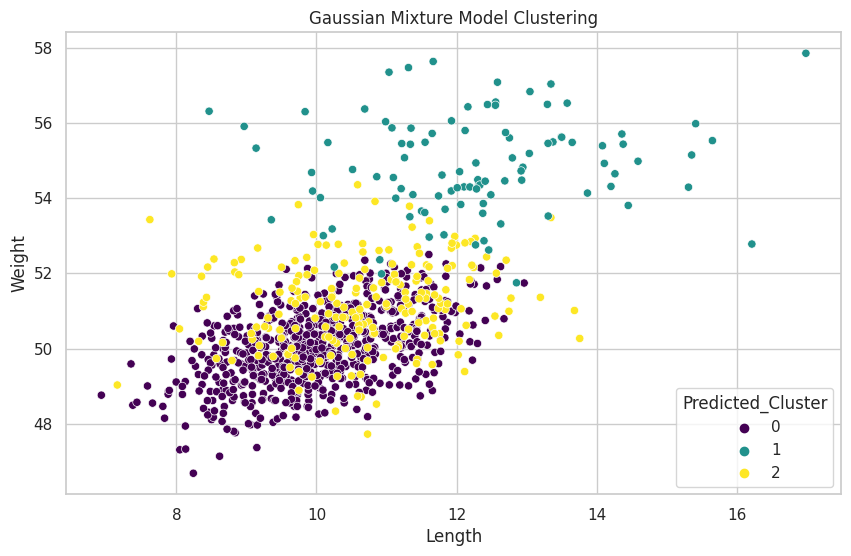

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Scatter plot of two features from the dataset, colored by the predicted cluster
# Choosing 'Length' and 'Weight' for visualization, you can change these based on your interest
sns.scatterplot(x='Length', y='Weight', hue='Predicted_Cluster', palette='viridis', data=df_clustered)

# Adding title and labels
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Length')
plt.ylabel('Weight')

# Show the plot
plt.show()

<Figure size 1500x1500 with 0 Axes>

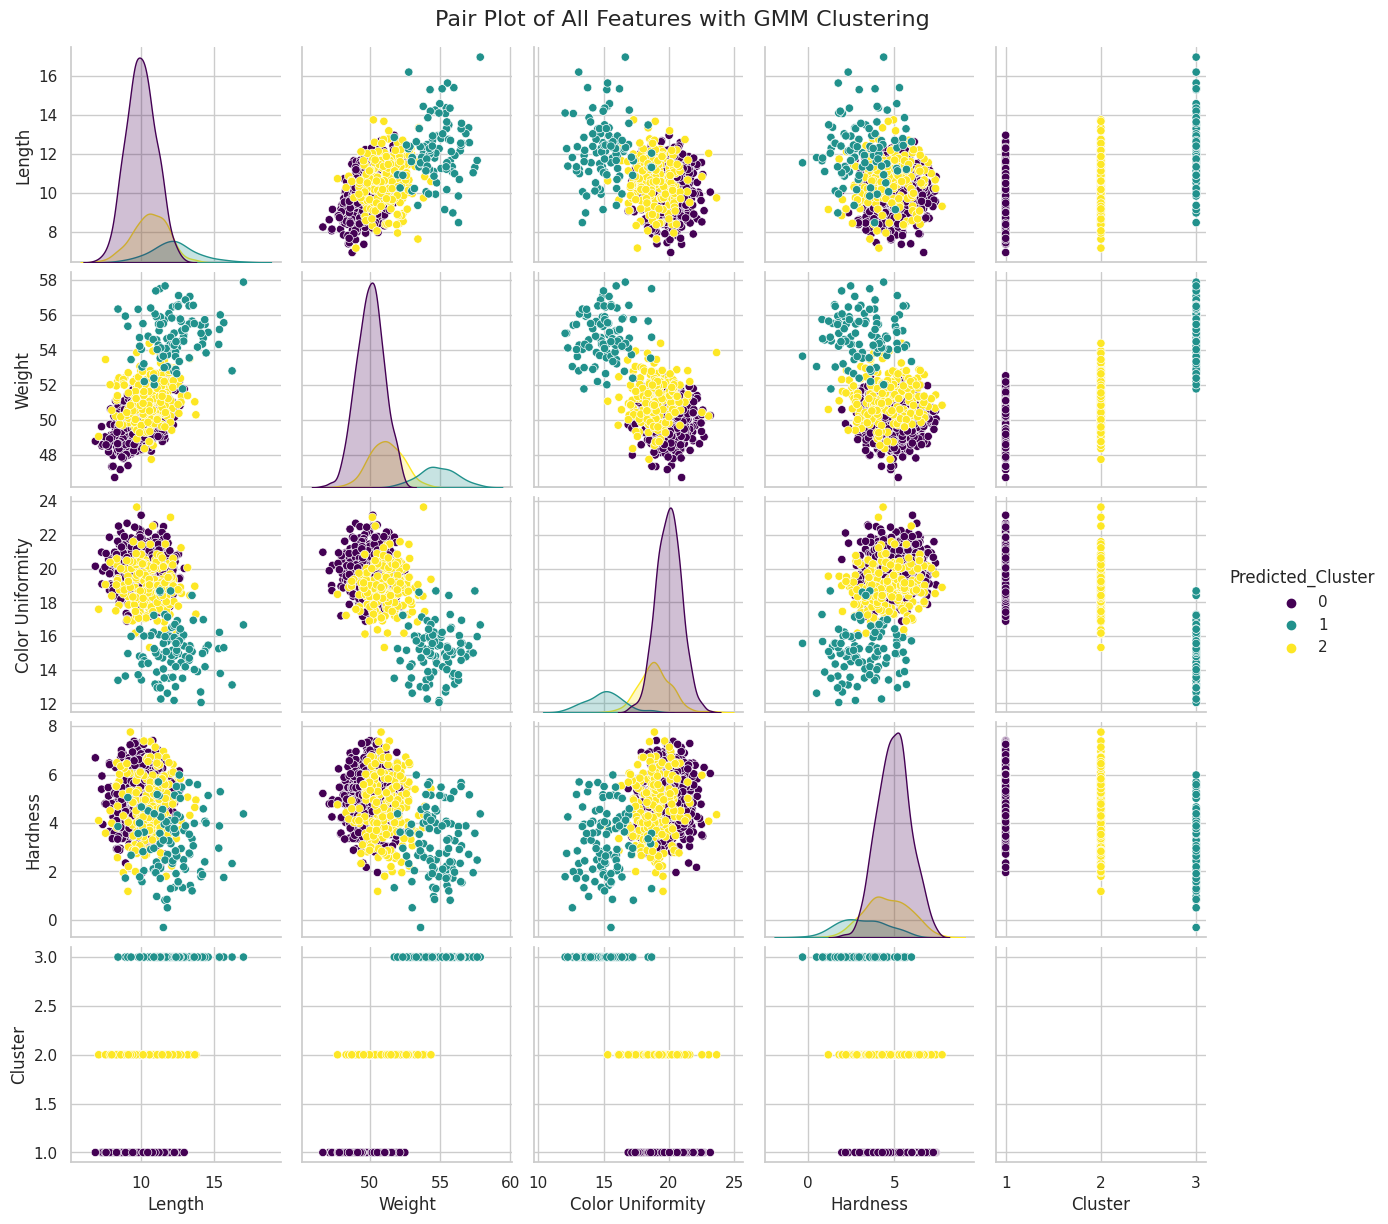

In [7]:
# Pair plot including all features and the predicted clusters
plt.figure(figsize=(15, 15))

# Creating a pair plot
sns.pairplot(df_clustered, hue='Predicted_Cluster', palette='viridis', diag_kind='kde')

# Adding a title
plt.suptitle('Pair Plot of All Features with GMM Clustering', size=16)
plt.subplots_adjust(top=0.95)  # Adjusting title position

# Show the plot
plt.show()